# <h1 align = "center">Titanic Survival Prediction</h1>
<div style="width:100%;text-align: center;"> <img align = middle src="https://cdn.wallpapersafari.com/85/81/klWnN6.jpg" style="height:500px"> </div>

# Dataset Fields
- **PassengerId**: Unique Id for each passenger
- **Survived**: Binary value for survival (0 = No, 1 = Yes)
- **Pclass**: Ticket class for each passenger (1 = 1<sup>st</sup> Class, 2 = 2<sup>nd</sup> Class, 3 = 3<sup>rd</sup> Class)
- **Sex**: Gender of each passenger
- **Age**: Age of each passenger in years
- **SibSp**: Number of siblings or spouses aboard the Titanic
- **Parch**: Number of parents or children aboard the Titanic
- **Ticket**: Ticket number for the passenger
- **Fare**: Price of the ticker
- **Cabin**: Cabin number of the passenger
- **Embarked**: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

# Importing the Necessary Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
import graphviz
import missingno as msno

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier

from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

import warnings
warnings.filterwarnings('ignore')
# to ignore convergence warning from sklearn
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

<h3>Looking at the input files in the directory</h3>

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# Dataset Information

<h3>Reading the data</h3>

In [3]:
df = pd.read_csv('/kaggle/input/titanic/train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<h3>Getting information about our dataset</h3>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB



<h3>Looking at the statistical summary of our data</h3>

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<h3>Total missing values in the dataset</h3>

In [7]:
print("Count of the missing values")
print(30 * "-")
print(df.isna().sum())
print(30 * "-")
print("Total missing values are:", df.isna().sum().sum())
print(30 * "-")

Count of the missing values
------------------------------
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
------------------------------
Total missing values are: 866
------------------------------


# Exploratory Data Analysis (EDA) 

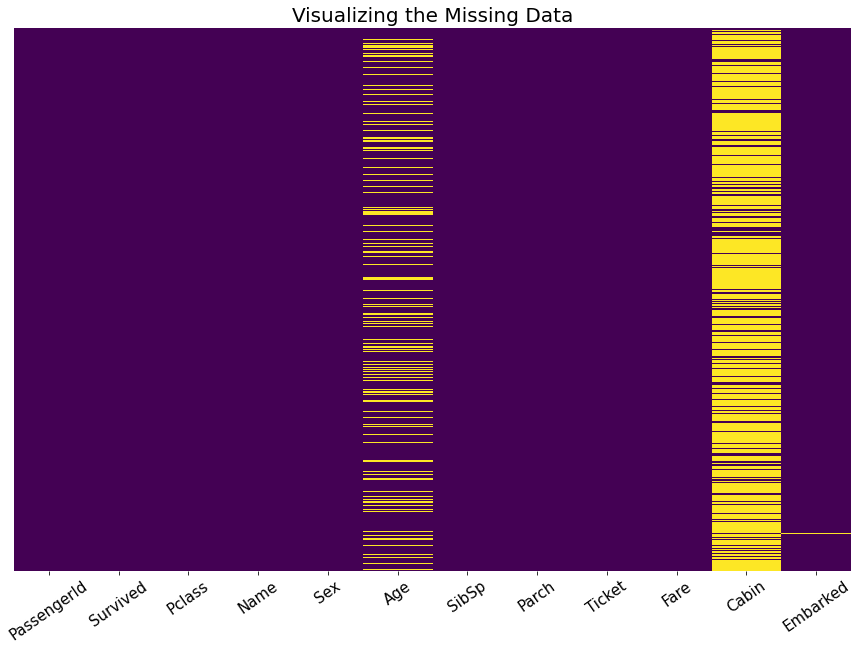

In [8]:
plt.figure(figsize = (15, 10))
sns.heatmap(df.isna(), yticklabels = False, cbar = False, cmap = 'viridis')
plt.title("Visualizing the Missing Data", fontsize = 20)
plt.xticks(rotation = 35, fontsize = 15)
plt.show()

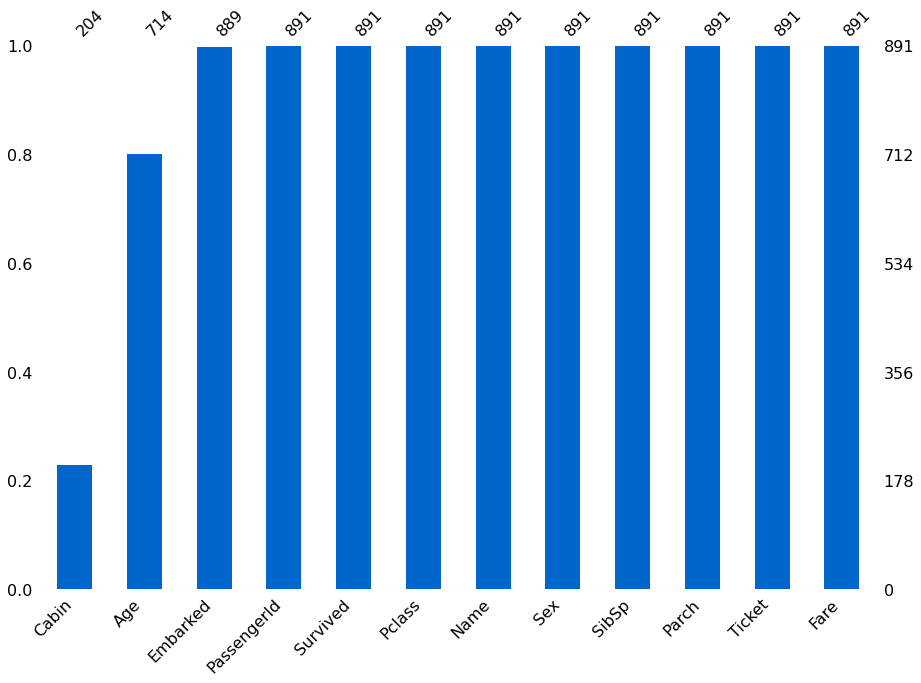

In [9]:
msno.bar(df, color = (0, 0.4, 0.8), sort = "ascending", figsize = (15, 10))
plt.show()

In [10]:
print("Missing Data in the Cabin column =", (df['Cabin'].isna().sum() / len(df['Cabin']) * 100), "%")

Missing Data in the Cabin column = 77.10437710437711 %


Due to a high number of missing data in the `Cabin` column, it would be better to drop the entire column, rather than try and fill all the values. Since `Age` and `Embarked` have a relatively lower number of missing values it is possible to fill them.

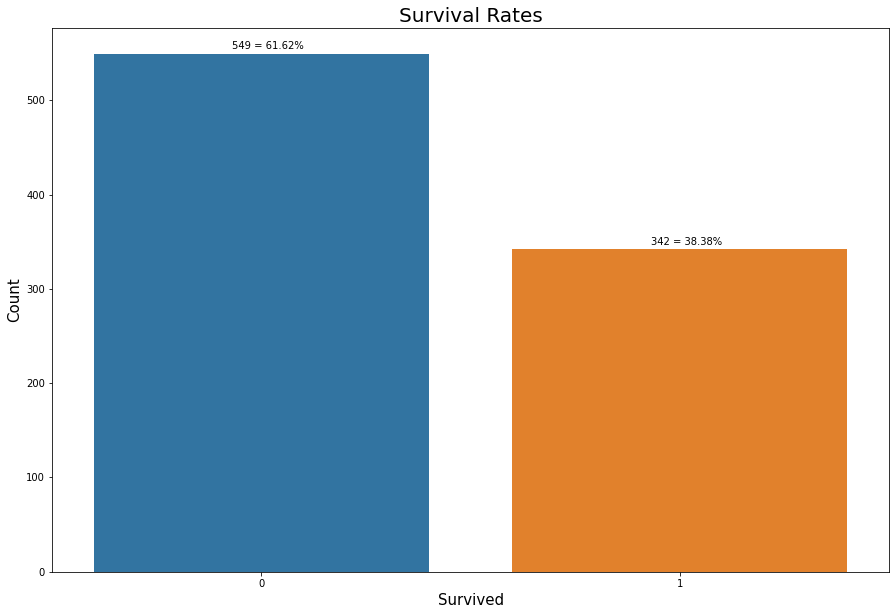

In [11]:
plt.figure(figsize = (15, 10))
ax = sns.countplot(x = 'Survived', data = df)
plt.title('Survival Rates', fontsize = 20)
plt.xlabel('Survived', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
for p in ax.patches:
        ax.annotate('{:.0f} = {:.2f}%'.format(p.get_height(), (p.get_height() / len(df['Survived'])) * 100), (p.get_x() + 0.33, p.get_height() + 5))
plt.show()

Based on the data in the `Survived` column, we observe that only 342 passengers managed to survive (38.38%).

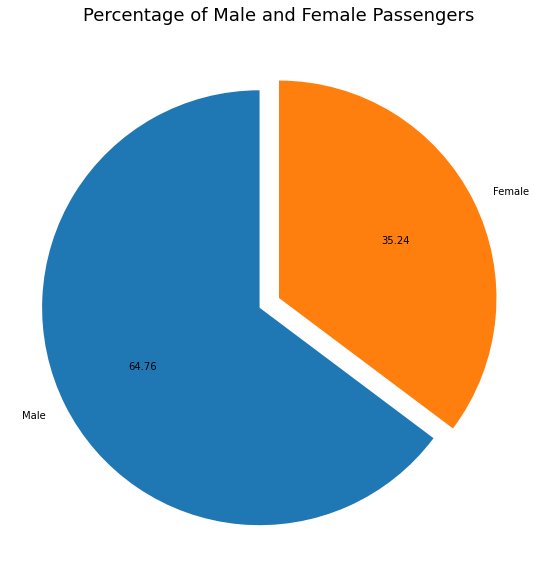

In [12]:
plt.figure(figsize = (15, 10))
plt.pie([(df.Sex == 'male').sum(), (df.Sex == 'female').sum()], labels = ["Male", "Female"], autopct = "%.2f", startangle = 90, explode = (0.1, 0.0))
plt.title('Percentage of Male and Female Passengers', fontsize = 18)
plt.show()

Majority of the passengers aboard the Titanic were Male (64.76 %).<br>
Let us now take a look at the Survival Rates for Male and Female passengers.

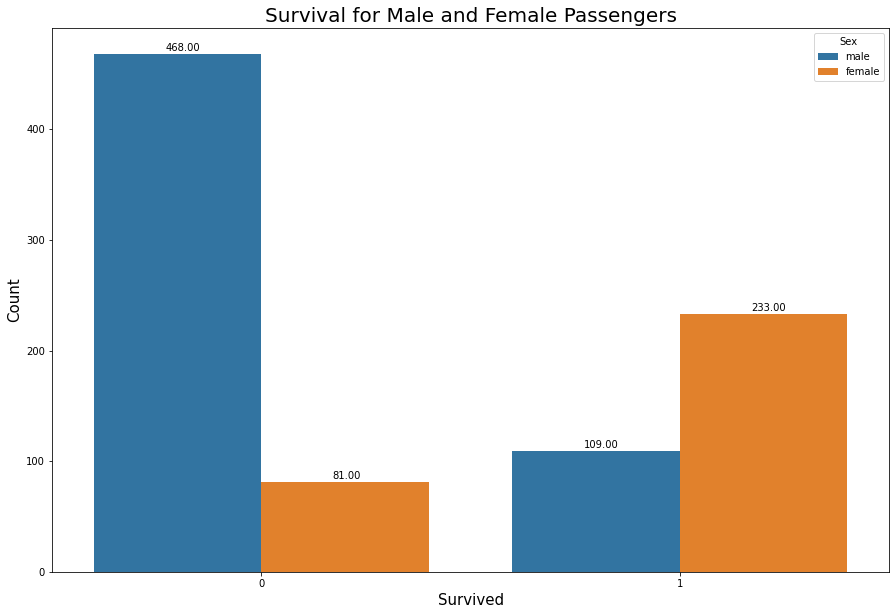

In [13]:
plt.figure(figsize = (15, 10))
ax = sns.countplot(x = 'Survived', hue = 'Sex', data = df)
plt.title('Survival for Male and Female Passengers', fontsize = 20)
plt.xlabel('Survived', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
for p in ax.patches:
        ax.annotate('{:.2f}'.format(p.get_height()), (p.get_x() + 0.17, p.get_height() + 3))
plt.show()

**Observations**<br>
- Most of the Male passengers have not survived.<br>
- Majority of the Female passengers have survived.

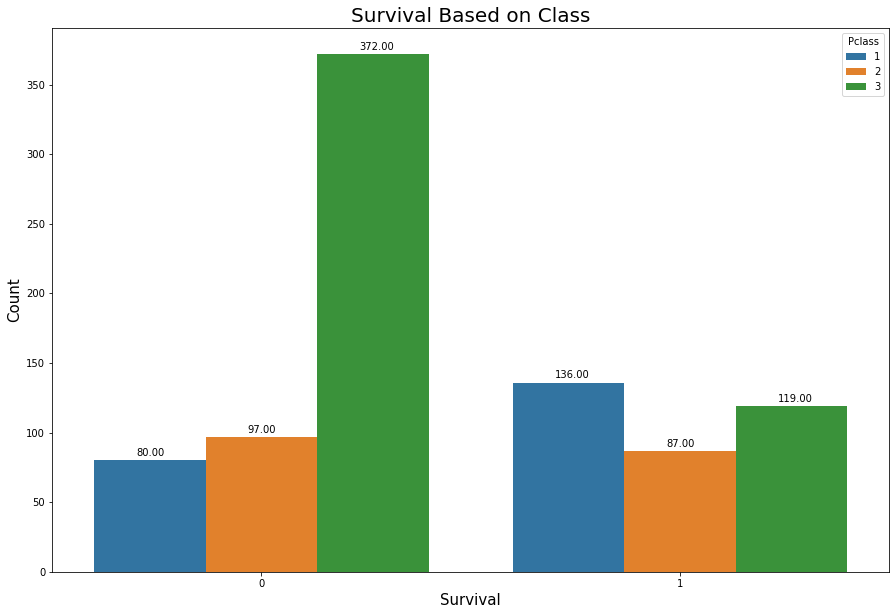

In [14]:
plt.figure(figsize = (15, 10))
ax = sns.countplot(x = 'Survived', hue = 'Pclass', data = df)
plt.title('Survival Based on Class', fontsize = 20)
plt.xlabel('Survival', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
for p in ax.patches:
        ax.annotate('{:.2f}'.format(p.get_height()), (p.get_x() + 0.1, p.get_height() + 3))
plt.show()

We notice that `Pclass` of the passenger does affect their survival odds.<br>
Passengers in the 3<sup>rd</sup> class have a much higher mortality rate as compared to the other two classes.<br>
The 1<sup>st</sup> class has a higher number of passengers that survived, probably because they were richer.

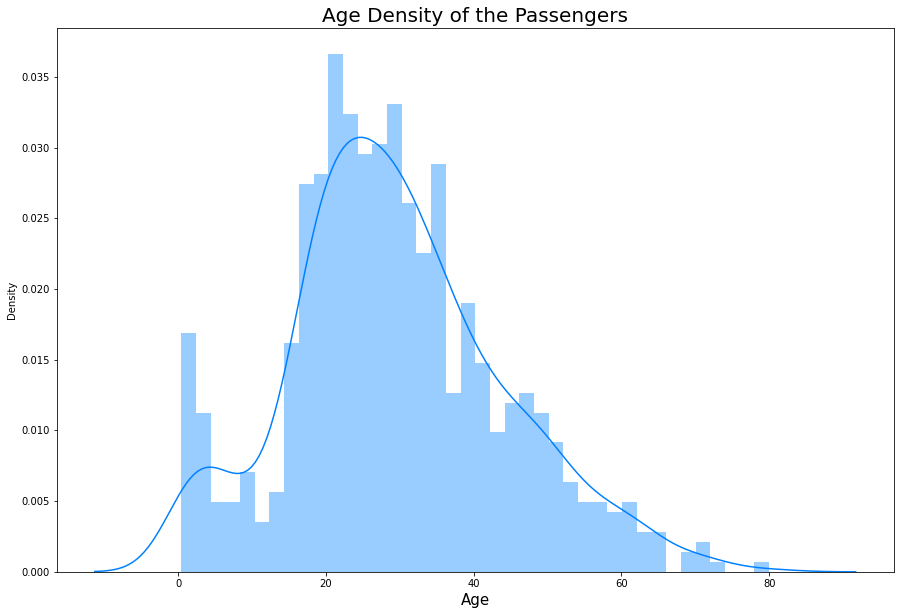

In [15]:
plt.figure(figsize = (15, 10))
sns.distplot(df['Age'].dropna(), color = (0, 0.5, 1), bins = 40, kde = True)
plt.title('Age Density of the Passengers', fontsize = 20)
plt.xlabel('Age', fontsize = 15)
plt.show()

Majority of the passengers on the Titanic were between 20 to 40 years of age

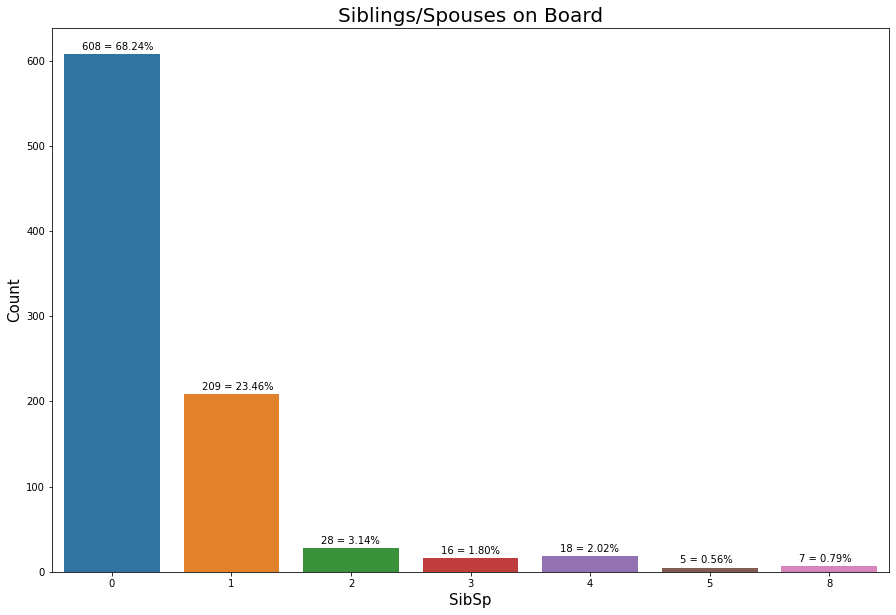

In [16]:
plt.figure(figsize = (15, 10))
ax = sns.countplot(x = 'SibSp', data = df)
plt.title('Siblings/Spouses on Board', fontsize = 20)
plt.xlabel('SibSp', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
for p in ax.patches:
        ax.annotate('{:.0f} = {:.2f}%'.format(p.get_height(), (p.get_height() / len(df['SibSp'])) * 100), (p.get_x() + 0.15, p.get_height() + 5))
plt.show()

`SibSp` indicates the number of Siblings or Spouses on board.<br>
From the countplot we see that most of the passengers were travelling alone.

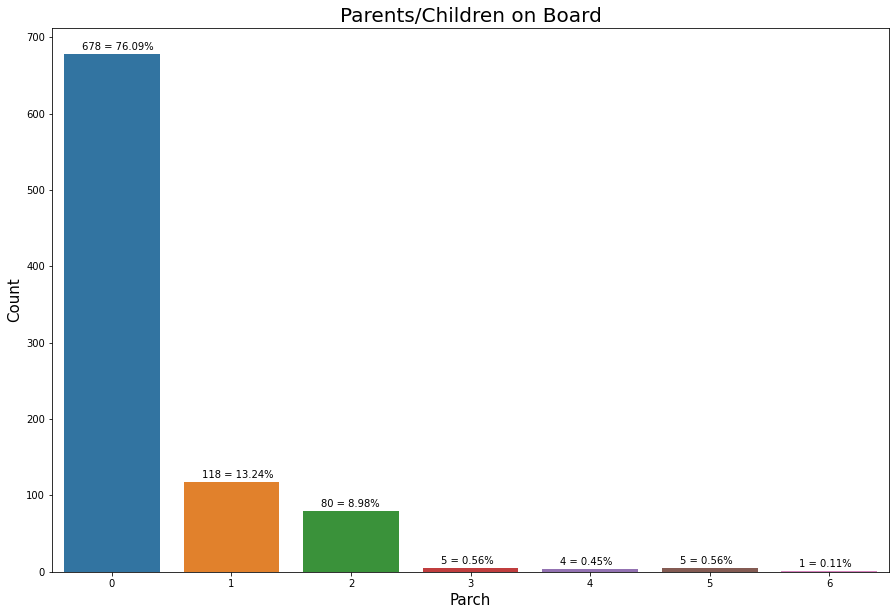

In [17]:
plt.figure(figsize = (15, 10))
ax = sns.countplot(x = 'Parch', data = df)
plt.title('Parents/Children on Board', fontsize = 20)
plt.xlabel('Parch', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
for p in ax.patches:
        ax.annotate('{:.0f} = {:.2f}%'.format(p.get_height(), (p.get_height() / len(df['SibSp'])) * 100), (p.get_x() + 0.15, p.get_height() + 5))
plt.show()

`Parch` indicates the number of Parents or Children aboard the ship<br>
Just like in the case of `SibSp` we can observe that most of the people are travelling on their own.

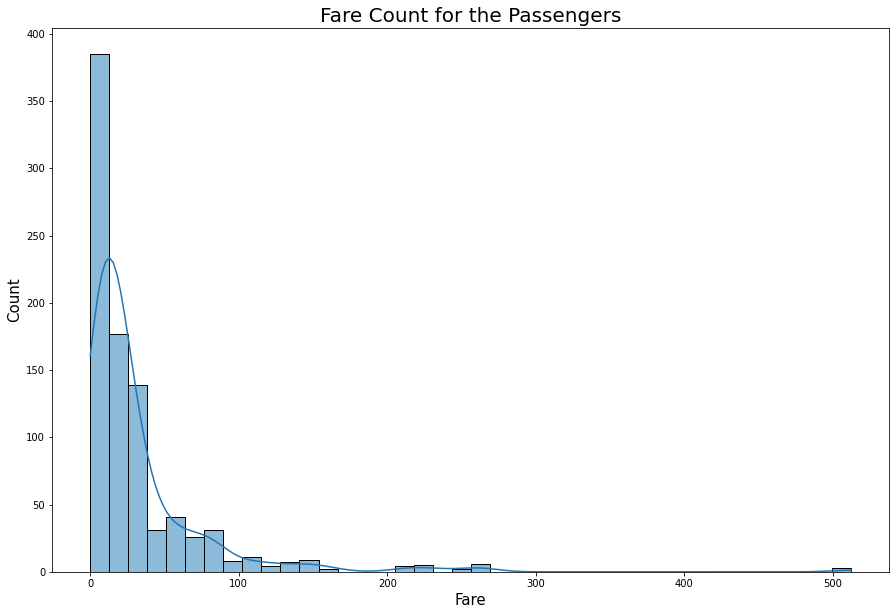

In [18]:
plt.figure(figsize = (15, 10))
sns.histplot(df['Fare'], bins = 40, kde = True)
plt.title('Fare Count for the Passengers', fontsize = 20)
plt.xlabel('Fare', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

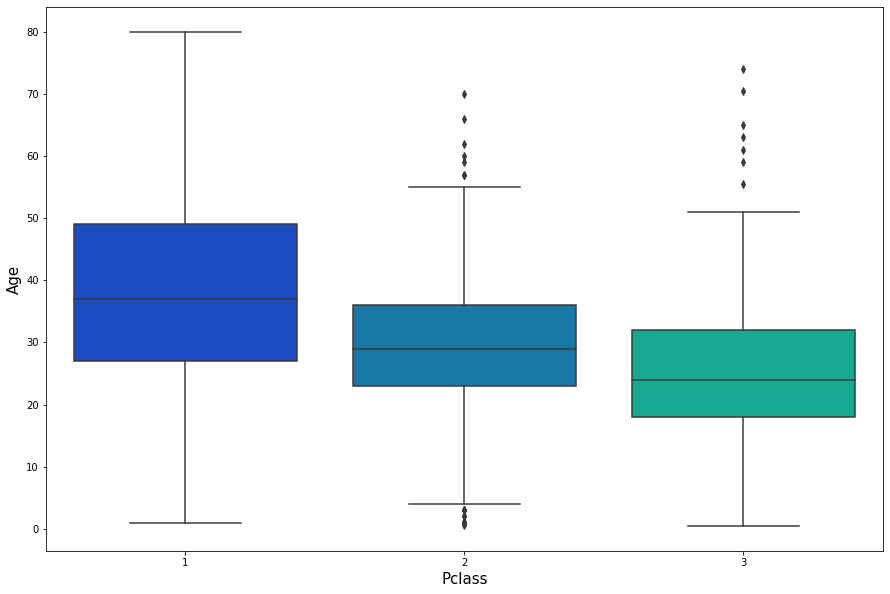

In [19]:
plt.figure(figsize = (15, 10))
bp = sns.boxplot(x = 'Pclass', y = 'Age', data = df, palette = 'winter')
plt.xlabel('Pclass', fontsize = 15)
plt.ylabel('Age', fontsize = 15)
plt.show()

Looking at the median age of the passengers based on their class.<br>
The median age of the passengers in the 1<sup>st</sup> class is the highest.<br>
The median age of the passengers in the 3<sup>rd</sup> class is the lowest.<br>
Let us fill in the missing values in the `Age` column based on the median age of the `Pclass`.

In [20]:
def transform_columns(column):
    Age = column[0]
    Pclass = column[1]
    
    if(pd.isna(Age)):
       if(Pclass == 1):
            return 38
       elif(Pclass == 2):
            return 29   
       else:
            return 23  
    else:
       return Age

df['Age'] = df[['Age', 'Pclass']].apply(transform_columns, axis = 1)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,23.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Feature Engineering

Lets create a new feature `IsAlone` that tells us if the passenger is travelling solo or with a family.

In [21]:
df['IsAlone'] = df['SibSp'] + df['Parch']
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,23.0,1,2,W./C. 6607,23.4500,NaN,S,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0


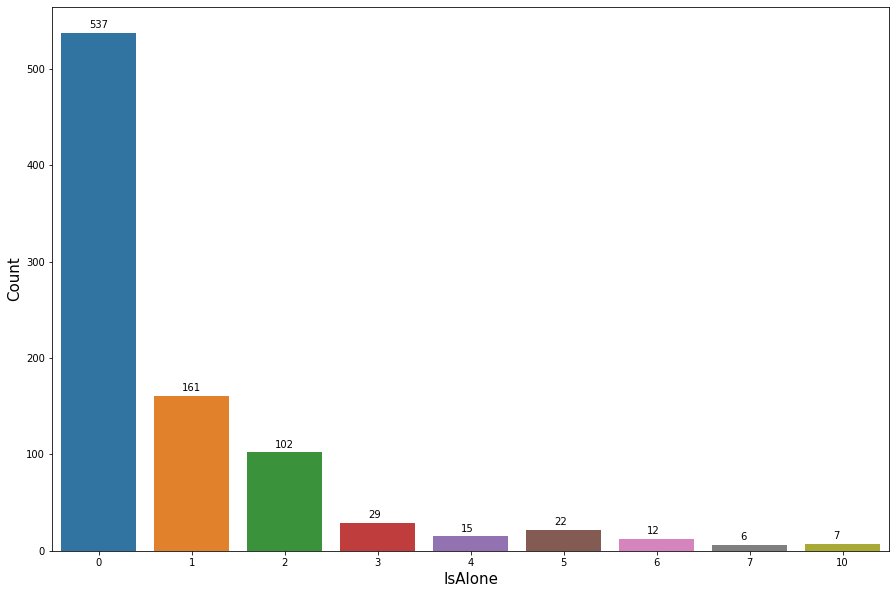

In [22]:
plt.figure(figsize = (15, 10))
ax = sns.countplot(x = 'IsAlone', data = df)
plt.xlabel('IsAlone', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + 0.30, p.get_height() + 5))
plt.show()

As we can observe from the `IsAlone` feature most passengers are travelling by themselves, without any family.

In [23]:
def convert_IsAlone(df):
    
    bins = [None] * len(df)

    for i in range(len(df)):
        if(df.IsAlone[i] in [0]):
            bins[i] = 'Alone'
        if(df.IsAlone[i] in [1, 2, 3, 4, 5, 6, 7, 10]):
            bins[i] = 'Not Alone'

    df['IsAlone'] = bins
    
convert_IsAlone(df)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Not Alone
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Not Alone
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Not Alone
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Alone
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Alone
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Alone
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,23.0,1,2,W./C. 6607,23.4500,NaN,S,Not Alone
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Alone


We created 2 groups for the `IsAlone` feature.<br>
- The first group is named `Alone` and contains passengers travelling alone.<br>
- The second group `Not Alone` is for passengers having one or more family member.

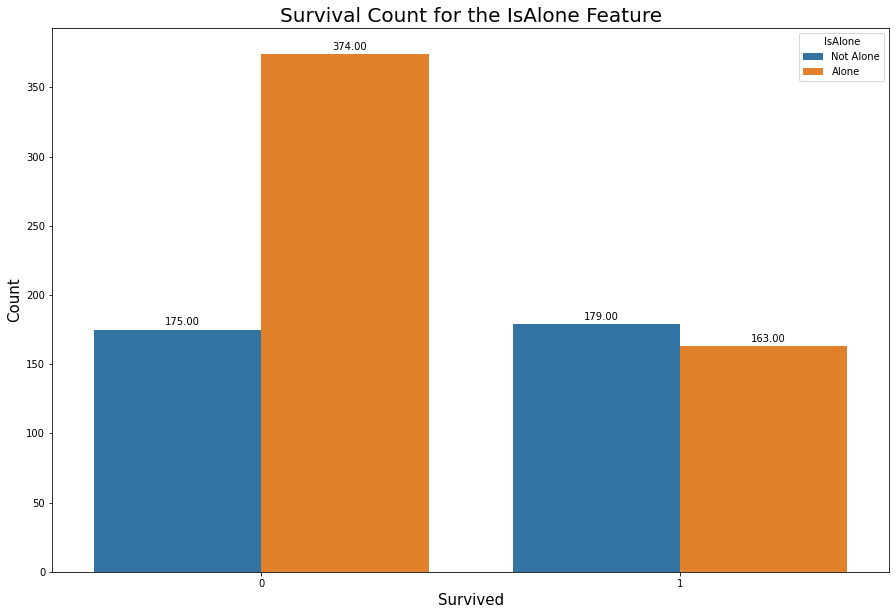

In [24]:
plt.figure(figsize = (15, 10))
ax = sns.countplot(x = 'Survived', hue = 'IsAlone', data = df)
plt.title('Survival Count for the IsAlone Feature', fontsize = 20)
plt.xlabel('Survived', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
for p in ax.patches:
        ax.annotate('{:.2f}'.format(p.get_height()), (p.get_x() + 0.17, p.get_height() + 3))
plt.show()

- Passengers that travelled alone have a higher mortality than passengers that travelled with family.
- The survival chances for passengers tha travelled alone and those that travelled with family is almost the same.

In [25]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Not Alone
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Not Alone
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Not Alone
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Alone
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Alone
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Alone
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,23.0,1,2,W./C. 6607,23.4500,NaN,S,Not Alone
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Alone


In [26]:
df.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked'], axis = 1, inplace = True)
df

,Survived,Pclass,Sex,Age,Fare,IsAlone
0,0,3,male,22.0,7.2500,Not Alone
1,1,1,female,38.0,71.2833,Not Alone
2,1,3,female,26.0,7.9250,Alone
3,1,1,female,35.0,53.1000,Not Alone
4,0,3,male,35.0,8.0500,Alone
...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,Alone
887,1,1,female,19.0,30.0000,Alone
888,0,3,female,23.0,23.4500,Not Alone
889,1,1,male,26.0,30.0000,Alone


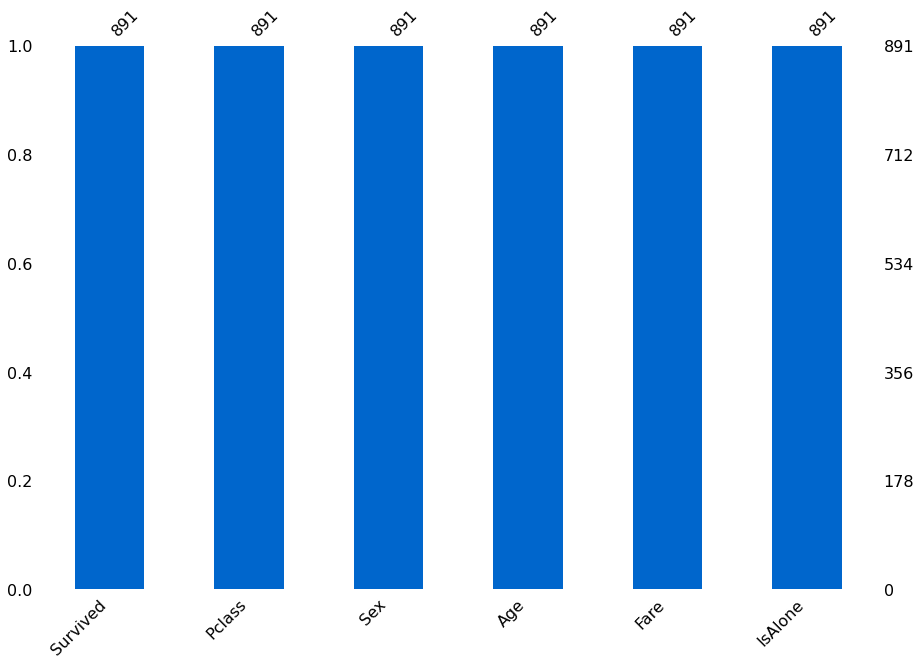

In [27]:
msno.bar(df, color = (0, 0.4, 0.8), sort = "ascending", figsize = (15, 10))
plt.show()

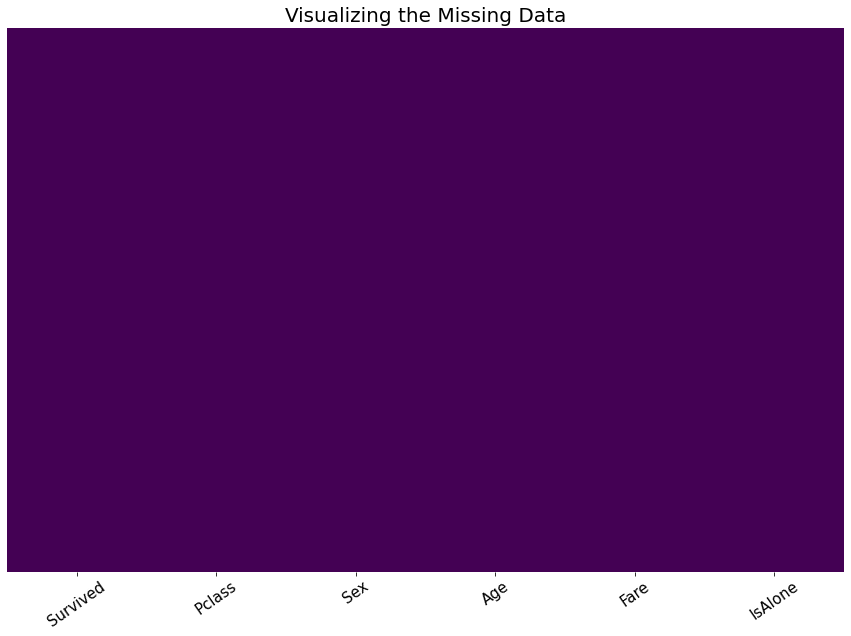

In [28]:
plt.figure(figsize = (15, 10))
sns.heatmap(df.isna(), yticklabels = False, cbar = False, cmap = 'viridis')
plt.title("Visualizing the Missing Data", fontsize = 20)
plt.xticks(rotation = 35, fontsize = 15)
plt.show()

Our dataset no longer contains any missing values. We can now encode and scale the data to start training our ML models.

# Checking for Correlation

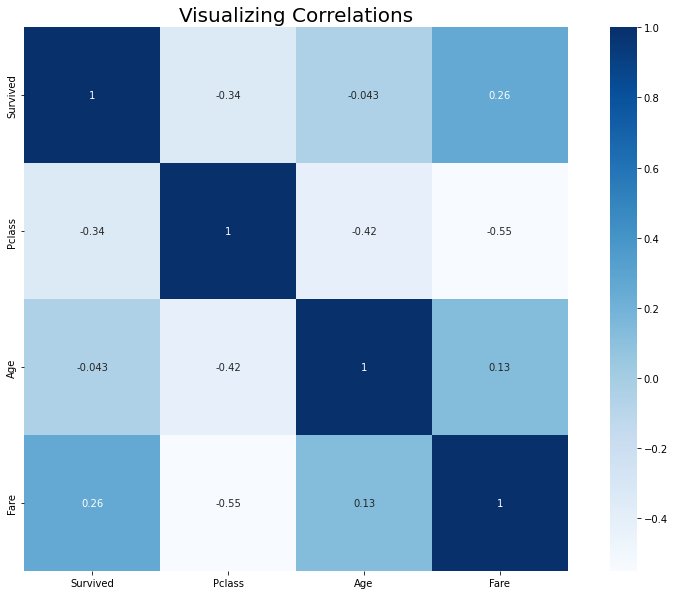

In [29]:
plt.figure(figsize = (15, 10))
sns.heatmap(df.corr(), cmap = 'Blues', square = True, annot = True)
plt.title("Visualizing Correlations", size = 20)
plt.show()

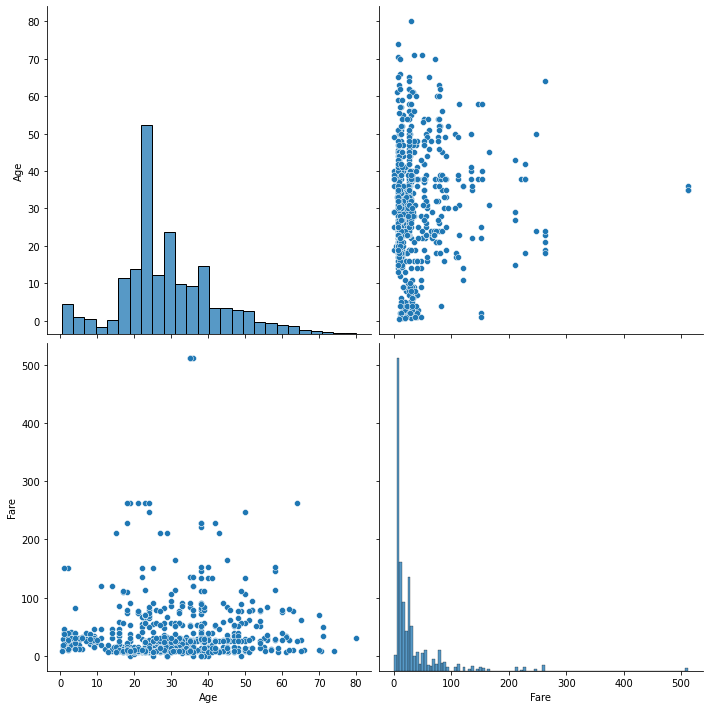

In [30]:
numeric_features = ['Age', 'Fare']
sns.pairplot(df[numeric_features], size = 5)
plt.show()

# Encoding the Categorical Features
The categorical data can be encoded using Label Encoder. It encodes labels with a value between 0 and n_classes - 1 where n is the number of distinct labels. If a label repeats it assigns the same value as assigned earlier. The categorical values can be converted into numeric values.

In [31]:
label_encoder = LabelEncoder()

def label_encoder_converter(df):
    
    df['Sex'] = label_encoder.fit_transform(df['Sex'])
    df['IsAlone'] = label_encoder.fit_transform(df['IsAlone'])
    
label_encoder_converter(df)

# Scaling the Data
StandardScaler standardizes a feature by subtracting the mean and then scaling it to unit variance.
<div style="width:100%;text-align: center;"> <img align = left src="https://cdn-images-1.medium.com/max/800/0*vQEjz0mvylP--30Q.GIF" style="height:150px"></div>

In [32]:
scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])
df

,Survived,Pclass,Sex,Age,Fare,IsAlone
0,0,3,1,-0.521504,-0.502445,1
1,1,1,0,0.679523,0.786845,1
2,1,3,0,-0.221247,-0.488854,0
3,1,1,0,0.454331,0.420730,1
4,0,3,1,0.454331,-0.486337,0
...,...,...,...,...,...,...
886,0,2,1,-0.146183,-0.386671,0
887,1,1,0,-0.746697,-0.044381,0
888,0,3,0,-0.446440,-0.176263,1
889,1,1,1,-0.221247,-0.044381,0


In [33]:
X = df.iloc[:, 1:]
y = df['Survived']
print(X, "\n\n\n", y)

     Pclass  Sex       Age      Fare  IsAlone
0         3    1 -0.521504 -0.502445        1
1         1    0  0.679523  0.786845        1
2         3    0 -0.221247 -0.488854        0
3         1    0  0.454331  0.420730        1
4         3    1  0.454331 -0.486337        0
..      ...  ...       ...       ...      ...
886       2    1 -0.146183 -0.386671        0
887       1    0 -0.746697 -0.044381        0
888       3    0 -0.446440 -0.176263        1
889       1    1 -0.221247 -0.044381        0
890       3    1  0.229138 -0.492378        0

[891 rows x 5 columns] 


 0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [34]:
df

,Survived,Pclass,Sex,Age,Fare,IsAlone
0,0,3,1,-0.521504,-0.502445,1
1,1,1,0,0.679523,0.786845,1
2,1,3,0,-0.221247,-0.488854,0
3,1,1,0,0.454331,0.420730,1
4,0,3,1,0.454331,-0.486337,0
...,...,...,...,...,...,...
886,0,2,1,-0.146183,-0.386671,0
887,1,1,0,-0.746697,-0.044381,0
888,0,3,0,-0.446440,-0.176263,1
889,1,1,1,-0.221247,-0.044381,0


# Splitting the Data into Train and Validation Sets

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Define numerical metrics for binary classification

In [41]:
# This function includes the numerical metrics for the binary classification model evaluation
def numerical_metrics_binary_classification(y_pred, y_val, message_to_print):
    acc = accuracy_score(y_val, y_pred)
    print("Accuracy for", message_to_print, acc * 100, "%")
    print(90 * "-")
    
    precision = precision_score(y_val, y_pred)
    print("Precision for", message_to_print, precision * 100, "%")
    print(90 * "-")
    
    recall = recall_score(y_val, y_pred)
    print("Recall for", message_to_print, precision * 100, "%")
    print(90 * "-")
    
    F1 = f1_score(y_val, y_pred)
    print("F1 for", message_to_print, precision * 100, "%")
    print(90 * "-")
    
    cm = confusion_matrix(y_val, y_pred)
    print("Confusion matrix for", message_to_print)
    print(90 * "-")
    print(cm)

# Logistic Regression(No hyperparameters tunning)
Logistic regression is a supervised learning algorithm used to predict the probability of a target variable. It is used for classification, in this case to predict whether a passenger survived or not

In [43]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
print(lr.get_params())
print(90 * "-")
y_pred = lr.predict(X_test)
numerical_metrics_binary_classification(y_pred, y_test, "logistic regression(without hyperparameters tunning):")

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
------------------------------------------------------------------------------------------
Accuracy for logistic regression(without hyperparameters tunning): 79.88826815642457 %
------------------------------------------------------------------------------------------
Precision for logistic regression(without hyperparameters tunning): 75.38461538461539 %
------------------------------------------------------------------------------------------
Recall for logistic regression(without hyperparameters tunning): 75.38461538461539 %
------------------------------------------------------------------------------------------
F1 for logistic regression(without hyperparameters tunning): 75.38461538461539 %
------------------

# Logistic Regression(hyperparameters tunning)
Logistic regression is a supervised learning algorithm used to predict the probability of a target variable. It is used for classification, in this case to predict whether a passenger survived or not.
The tunning mechanism is using grid searching the key hyperparameters for Logistic Regression.

In [44]:
# define grid search parameters
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'] # the algorithm to use for optimization
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
max_iter_values = [20, 50, 100, 200, 500, 1000] # the number of iterations
class_weight_values = ['balanced'] # troubleshoot unbalanced data sampling

grid = dict(solver=solvers,penalty=penalty,C=c_values, max_iter=max_iter_values, class_weight=class_weight_values)
# hyperparameter tunning with grid search
lr_model = LogisticRegression()
lr_grid_tune = GridSearchCV(estimator=lr_model, param_grid=grid, n_jobs=-1, cv=10, scoring='accuracy',error_score=0, verbose=1)
lr_grid_tune.fit(X_train, y_train)

print(lr_grid_tune.best_estimator_)
print(90 * "-")

# predict on test data
y_pred = lr_grid_tune.predict(X_test)

# numeric matrix
numerical_metrics_binary_classification(y_pred, y_test, "logistic regression(hyperparameters tunning):")

Fitting 10 folds for each of 150 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    2.9s


LogisticRegression(C=100, class_weight='balanced', max_iter=20, solver='saga')
------------------------------------------------------------------------------------------
Accuracy for logistic regression(hyperparameters tunning): 81.56424581005587 %
------------------------------------------------------------------------------------------
Precision for logistic regression(hyperparameters tunning): 72.5 %
------------------------------------------------------------------------------------------
Recall for logistic regression(hyperparameters tunning): 72.5 %
------------------------------------------------------------------------------------------
F1 for logistic regression(hyperparameters tunning): 72.5 %
------------------------------------------------------------------------------------------
Confusion matrix for logistic regression(hyperparameters tunning):
------------------------------------------------------------------------------------------
[[88 22]
 [11 58]]


[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:    8.9s finished


The tunned model out-performs un-tunned model based on accuracy and recall.

# Ridge Classifer(Non hyperparameter tunning)
Ridge regression is a penalized linear regression model for predicting a numerical value.
Nevertheless, it can be very effective when applied to classification.

In [45]:
rc = RidgeClassifier()
print(rc.get_params())
print(90 * "-")
rc.fit(X_train, y_train)
y_pred = rc.predict(X_test)

# numeric matrix
numerical_metrics_binary_classification(y_pred, y_test, "ridge classifer(without hyperparameters tunning):")

{'alpha': 1.0, 'class_weight': None, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'normalize': False, 'random_state': None, 'solver': 'auto', 'tol': 0.001}
------------------------------------------------------------------------------------------
Accuracy for ridge classifer(without hyperparameters tunning): 78.77094972067039 %
------------------------------------------------------------------------------------------
Precision for ridge classifer(without hyperparameters tunning): 73.84615384615385 %
------------------------------------------------------------------------------------------
Recall for ridge classifer(without hyperparameters tunning): 73.84615384615385 %
------------------------------------------------------------------------------------------
F1 for ridge classifer(without hyperparameters tunning): 73.84615384615385 %
------------------------------------------------------------------------------------------
Confusion matrix for ridge classifer(without hyperpa

# Ridge Classifer(hyperparameter tunning)
Ridge regression is a penalized linear regression model for predicting a numerical value.
Nevertheless, it can be very effective when applied to classification.
The tunning mechanism is using grid searching the key hyperparameters for Logistic Regression.

In [46]:
# define grid search parameters
alpha_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

grid = dict(alpha=alpha_values)
# hyperparameter tunning with grid search
rc_model = RidgeClassifier()
rc_grid_tune = GridSearchCV(estimator=rc_model, param_grid=grid, n_jobs=-1, cv=10, scoring='accuracy',error_score=0, verbose=1)
rc_grid_tune.fit(X_train, y_train)

print(rc_grid_tune.best_params_)
print(90 * "-")

# predict on test data
y_pred = rc_grid_tune.predict(X_test)

# numeric matrix
numerical_metrics_binary_classification(y_pred, y_test, "ridge classifer(hyperparameters tunning):")

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


{'alpha': 1.0}
------------------------------------------------------------------------------------------
Accuracy for ridge classifer(hyperparameters tunning): 78.77094972067039 %
------------------------------------------------------------------------------------------
Precision for ridge classifer(hyperparameters tunning): 73.84615384615385 %
------------------------------------------------------------------------------------------
Recall for ridge classifer(hyperparameters tunning): 73.84615384615385 %
------------------------------------------------------------------------------------------
F1 for ridge classifer(hyperparameters tunning): 73.84615384615385 %
------------------------------------------------------------------------------------------
Confusion matrix for ridge classifer(hyperparameters tunning):
------------------------------------------------------------------------------------------
[[93 17]
 [21 48]]


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.4s finished


# Observation
There is no different for ridge classifer between tunned model and non tunned model.

# K-Nearest Neighbors(Non hyperparameter tunning)
KNN works by finding the distances between a query and all the examples in the data, selecting the specified number examples (K) closest to the query, then votes for the most frequent label.

In [48]:
knn = KNeighborsClassifier()
print(knn.get_params())
print(90 * "-")
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# numeric matrix
numerical_metrics_binary_classification(y_pred, y_test, "k nearnest neighbors(without hyperparameters tunning):")

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
------------------------------------------------------------------------------------------
Accuracy for k nearnest neighbors(without hyperparameters tunning): 82.12290502793296 %
------------------------------------------------------------------------------------------
Precision for k nearnest neighbors(without hyperparameters tunning): 79.36507936507937 %
------------------------------------------------------------------------------------------
Recall for k nearnest neighbors(without hyperparameters tunning): 79.36507936507937 %
------------------------------------------------------------------------------------------
F1 for k nearnest neighbors(without hyperparameters tunning): 79.36507936507937 %
------------------------------------------------------------------------------------------
Confusion matrix for k nearnest neighbors(without h

# K-Nearest Neighbors(Hyperparameter tunning)
KNN works by finding the distances between a query and all the examples in the data, selecting the specified number examples (K) closest to the query, then votes for the most frequent label. The tunning used grid searching the key hyperparamters for KNN.

In [49]:
# define grid search parameters
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
# hyperparameter tunning with grid search
knn_model = KNeighborsClassifier()
knn_grid_tune = GridSearchCV(estimator=knn_model, param_grid=grid, n_jobs=-1, cv=10, scoring='accuracy',error_score=0, verbose=1)
knn_grid_tune.fit(X_train, y_train)

print(knn_grid_tune.best_params_)
print(90 * "-")

# predict on test data
y_pred = knn_grid_tune.predict(X_test)

# numeric matrix
numerical_metrics_binary_classification(y_pred, y_test, "k nearest neighbors(hyperparameters tunning):")

Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    2.7s


{'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}
------------------------------------------------------------------------------------------
Accuracy for k nearest neighbors(hyperparameters tunning): 83.79888268156425 %
------------------------------------------------------------------------------------------
Precision for k nearest neighbors(hyperparameters tunning): 82.25806451612904 %
------------------------------------------------------------------------------------------
Recall for k nearest neighbors(hyperparameters tunning): 82.25806451612904 %
------------------------------------------------------------------------------------------
F1 for k nearest neighbors(hyperparameters tunning): 82.25806451612904 %
------------------------------------------------------------------------------------------
Confusion matrix for k nearest neighbors(hyperparameters tunning):
------------------------------------------------------------------------------------------
[[99 11]
 [18 

[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    4.2s finished


The tunned KNN model outperforms the non tunned one.

# Support Vector Classifier(Non hyperparameter tunning)
It is used in classification problems to predict which class the target variable belongs to.

In [50]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

print(knn.get_params())
print(90 * "-")

# numeric matrix
numerical_metrics_binary_classification(y_pred, y_test, "support vector classifer(Non hyperparameters tunning):")

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
------------------------------------------------------------------------------------------
Accuracy for support vector classifer(Non hyperparameters tunning): 79.3296089385475 %
------------------------------------------------------------------------------------------
Precision for support vector classifer(Non hyperparameters tunning): 75.0 %
------------------------------------------------------------------------------------------
Recall for support vector classifer(Non hyperparameters tunning): 75.0 %
------------------------------------------------------------------------------------------
F1 for support vector classifer(Non hyperparameters tunning): 75.0 %
------------------------------------------------------------------------------------------
Confusion matrix for support vector classifer(Non hyperparameters tunning):
---------------

# Support Vector Classifier(Hyperparameter tunning)
It is used in classification problems to predict which class the target variable belongs to.

In [51]:
# define grid search parameters
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']

grid = dict(kernel=kernel,C=C,gamma=gamma)
# hyperparameter tunning with grid search
svc_model = SVC()
svc_grid_tune = GridSearchCV(estimator=svc_model, param_grid=grid, n_jobs=-1, cv=10, scoring='accuracy',error_score=0, verbose=1)
svc_grid_tune.fit(X_train, y_train)

print(svc_grid_tune.best_params_)
print(90 * "-")

# predict on test data
y_pred = svc_grid_tune.predict(X_test)

# numeric matrix
numerical_metrics_binary_classification(y_pred, y_test, "support vector machine(hyperparameters tunning):")

Fitting 10 folds for each of 15 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    3.1s


{'C': 50, 'gamma': 'scale', 'kernel': 'poly'}
------------------------------------------------------------------------------------------
Accuracy for support vector machine(hyperparameters tunning): 80.44692737430168 %
------------------------------------------------------------------------------------------
Precision for support vector machine(hyperparameters tunning): 79.3103448275862 %
------------------------------------------------------------------------------------------
Recall for support vector machine(hyperparameters tunning): 79.3103448275862 %
------------------------------------------------------------------------------------------
F1 for support vector machine(hyperparameters tunning): 79.3103448275862 %
------------------------------------------------------------------------------------------
Confusion matrix for support vector machine(hyperparameters tunning):
------------------------------------------------------------------------------------------
[[98 12]
 [23 46]]


[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    3.7s finished


Tunned SVM model out-performs the non tunned one.

# Decision Tree Classifier
Decision trees use multiple algorithms to decide to split a node into two or more sub-nodes. The creation of sub-nodes increases the homogeneity of resultant sub-nodes. In other words, we can say that the purity of the node increases with respect to the target variable.
<div style="width:100%;text-align: center;"> <img align = left src="https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1545934190/1_r5ikdb.png" style="height:500px"> </div>

In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
acc_dtc = dtc.score(X_test, y_test)
print(acc_dtc * 100, "%")
cm_dtc = confusion_matrix(y_test, y_pred)
print(cm_dtc)

# Visualizing the Decision Tree Classifier

In [ ]:
dot_data = tree.export_graphviz(dtc, out_file = None, feature_names = X.columns, class_names = ["0", "1"], filled = True)
graph = graphviz.Source(dot_data, format = "jpg")
display(graph)

# Random Forest Classifier
The random forest is a classification algorithm consisting of many decisions trees. It uses bagging and feature randomness when building each individual tree to try to create an uncorrelated forest of trees whose prediction by committee is more accurate than that of any individual tree.
<div style="width:100%;text-align: center;"> <img align = left src="https://www.freecodecamp.org/news/content/images/2020/08/how-random-forest-classifier-work.PNG" style="height:400px"> </div>

In [ ]:
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
acc_rf = rf.score(X_test, y_test)
print(acc_rf * 100, "%")
cm_rf = confusion_matrix(y_test, y_pred)
print(cm_rf)

# AdaBoost Classifier
It combines multiple classifiers to increase the accuracy of classifiers. AdaBoost is an iterative ensemble method. AdaBoost classifier builds a strong classifier by combining multiple poorly performing classifiers so that you will get high accuracy strong classifier.

In [ ]:
adc = AdaBoostClassifier()
adc.fit(X_train, y_train)
y_pred = adc.predict(X_test)
acc = adc.score(X_test, y_test)
acc_adc = adc.score(X_test, y_test)
print(acc_adc * 100, "%")
cm_adc = confusion_matrix(y_test, y_pred)
print(cm_adc)

# Extra Trees Classifier
This is a type of ensemble learning technique which aggregates the results of multiple de-correlated decision trees collected in a “forest” to output it's classification result.

In [ ]:
etc = ExtraTreesClassifier()
etc.fit(X_train, y_train)
y_pred = etc.predict(X_test)
acc_etc = etc.score(X_test, y_test)
print(acc_etc * 100, "%")
cm_etc = confusion_matrix(y_test, y_pred)
print(cm_etc)

# Bagging Classifier
Bagging classifier is an ensemble technique that fits base classifiers each on random subsets of the original dataset and then aggregates their individual predictions to form a final prediction.

In [ ]:
bgc = BaggingClassifier()
bgc.fit(X_train, y_train)
y_pred = bgc.predict(X_test)
acc_bgc = bgc.score(X_test, y_test)
print(acc_bgc * 100, "%")
cm_bgc = confusion_matrix(y_test, y_pred)
print(cm_bgc)

# Gradient Boosting Classifier
Gradient boosting classifiers are a group of machine learning algorithms that combine many weak learning models together to create a strong predictive model.

In [ ]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)
acc_gbc = gbc.score(X_test, y_test)
print(acc_gbc * 100, "%")
cm_gbc = confusion_matrix(y_test, y_pred)
print(cm_gbc)

# XGBoost Classifier
XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework. XGBoost provides a highly efficient implementation of the stochastic gradient boosting algorithm and access to a suite of model hyperparameters designed to provide control over the model training process.

In [ ]:
xgbc = XGBClassifier(n_jobs = -1, silent = True, verbosity = 0)
xgbc.fit(X_train, y_train)
y_pred = xgbc.predict(X_test)
acc_xgbc = xgbc.score(X_test, y_test)
print(acc_xgbc * 100, "%")
cm_xgbc = confusion_matrix(y_test, y_pred)
print(cm_xgbc)

# Model Results

In [ ]:
data = {'Logistic Regression': acc_lr, 'KNN': acc_knn,
        'Support Vector Classifier': acc_svc, 'Decision Tree Classifier': acc_dtc, 'Random Forest Classifier': acc_rf,
        'Ada Boost Classifier': acc_adc, 'Extra Trees Classifier': acc_etc,
        'Bagging Classifier': acc_bgc, 'Gradient Boosting Classifier': acc_gbc,
        'XGBoost Classifier': acc_xgbc}
data = dict(sorted(data.items(), key = lambda x: x[1], reverse = True))
models = list(data.keys())
score = list(data.values())
fig = plt.figure(figsize = (15, 10))
sns.barplot(x = score, y = models)
plt.xlabel("Models Used", size = 20)
plt.xticks(size = 12)
plt.ylabel("Score", size = 20)
plt.yticks(size = 12)
plt.title("Score for Unoptimized models", size = 25)
plt.show()

# Creating the Submission File

In [ ]:
test_df = pd.read_csv('../input/titanic/test.csv')
test_df['Age'] = test_df[['Age', 'Pclass']].apply(transform_columns, axis = 1)
test_df = test_df.drop(columns = ['Cabin'], axis = 1)
test_df = test_df.fillna(df['Fare'].mean())
test_df['IsAlone'] = test_df['SibSp'] + test_df['Parch']
convert_IsAlone(test_df)
test_df.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Embarked'], axis = 1, inplace = True)
label_encoder_converter(test_df)
X = test_df.iloc[:, 0:]
y_pred_xgbc = xgbc.predict(X)
final_pred = list(y_pred_xgbc)
final_sub = pd.read_csv('../input/titanic/test.csv')['PassengerId']
final_sub = pd.DataFrame(final_sub)
final_sub['Survived'] = final_pred
final_sub.to_csv('submission.csv', index = False)
final_sub.head()